In [36]:
from pprint import pprint
from drama import oscar, ares
from drama.monte_carlo import Gaussian
import datetime

In [37]:
import matplotlib.pyplot as plt

In [38]:
pprint(oscar.get_basic_config())

{'aop': 80.0,
 'cross_section': 10.0,
 'disposal_option': 4.0,
 'drag_coefficient': 2.2,
 'ecc': 0.0001,
 'epoch': datetime.datetime(2012, 5, 1, 12, 0),
 'generate_oad_plot': 0.0,
 'inc': 98.6,
 'lifetime_limit': 25.0,
 'ma': 180.0,
 'mass': 2500.0,
 'raan': 60.0,
 'reflectivity_coefficient': 1.3,
 'sma': 6900.0}


In [39]:
results = oscar.run(sma=6678.0, epoch=datetime.datetime(2019, 3, 21), save_output_dirs='./run_1', keep_output_files='all', trajectory=True)

In [28]:
results["results"][0]['trajectory']

[{'epoch': '2019-03-21 00:00:00',
  'MJD': 25281.0,
  'sma': 6678.0,
  'ecc': 0.0001,
  'inc': 98.6,
  'raan': 60.0,
  'aop': 80.0,
  'ma': 180.0},
 {'epoch': '2019-03-26 00:00:00',
  'MJD': 25286.0,
  'sma': 6676.6226,
  'ecc': 0.0004105,
  'inc': 98.60121,
  'raan': 66.33312,
  'aop': 157.41695,
  'ma': 264.00342},
 {'epoch': '2019-03-31 00:00:00',
  'MJD': 25291.0,
  'sma': 6675.1943,
  'ecc': 0.0008027,
  'inc': 98.60054,
  'raan': 72.67056,
  'aop': 155.20848,
  'ma': 76.62744},
 {'epoch': '2019-04-05 00:00:00',
  'MJD': 25296.0,
  'sma': 6673.7093,
  'ecc': 0.0011697,
  'inc': 98.60064,
  'raan': 79.0128,
  'aop': 148.42881,
  'ma': 263.17054},
 {'epoch': '2019-04-10 00:00:00',
  'MJD': 25301.0,
  'sma': 6672.1619,
  'ecc': 0.0014985,
  'inc': 98.60181,
  'raan': 85.36123,
  'aop': 140.54419,
  'ma': 100.55358},
 {'epoch': '2019-04-15 00:00:00',
  'MJD': 25306.0,
  'sma': 6670.5477,
  'ecc': 0.0017797,
  'inc': 98.60103,
  'raan': 91.71453,
  'aop': 132.2782,
  'ma': 308.47476},


In [27]:
trajectory = results["results"][0]['trajectory']

In [32]:
sma_hist = [t['sma'] for t in trajectory]
ecc_hist = [t['ecc'] for t in trajectory]
inc_hist = [t['inc'] for t in trajectory]
raan_hist = [t['raan'] for t in trajectory]
aop_hist = [t['aop'] for t in trajectory]
ma_hist = [t['ma'] for t in trajectory]
# 2019-03-21 00:00:00
epoch_hist = [datetime.datetime.strptime(t['epoch'], '%Y-%m-%d %H:%M:%S') for t in trajectory]

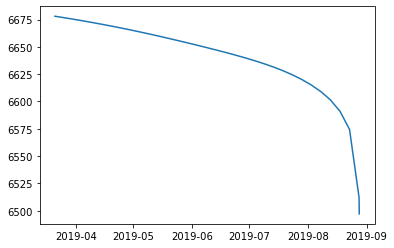

In [34]:
plt.plot(epoch_hist, sma_hist)

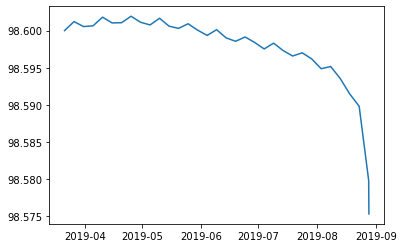

In [35]:
plt.plot(epoch_hist, inc_hist)

## Project Based Simulation

In [8]:
project = 'sgto_oscar.dpz'
pprint(oscar.get_basic_config(project=project))

{'aop': 0.0,
 'cross_section': 0.03,
 'disposal_option': 4.0,
 'drag_coefficient': 2.2,
 'ecc': 0.87,
 'epoch': datetime.datetime(2016, 11, 1, 12, 0),
 'generate_oad_plot': 0.0,
 'inc': 30.0,
 'lifetime_limit': 25.0,
 'ma': 0.0,
 'mass': 1.0,
 'raan': 0.0,
 'reflectivity_coefficient': 1.3,
 'sma': 51528.1}


In [9]:
inc = [i for i in range(10, 25, 5)]
raan = [r for r in range(100, 140, 10)]
output = oscar.run(inc=inc, raan=raan, project=project)
pprint(output)

{'config': {'id': 'PyOscar', 'inc': [10, 15, 20], 'raan': [100, 110, 120, 130]},
 'errors': [],
 'results': [{'config': {'id': 'PyOscar', 'inc': 10, 'raan': 100},
              'final_state': {'aop': 12.65,
                              'ecc': 6.21e-05,
                              'epoch': datetime.datetime(2021, 7, 22, 21, 30, 21),
                              'inc': 11.55,
                              'ma': 254.78,
                              'raan': 274.31,
                              'sma': 6456.84},
              'geo_crossing': None,
              'lifetime': 4.96,
              'logfile': "Output file 'oscar.log' (unit =  77) OPENED.\n"
                         '\n'
                         '                 _/_/      _/_/_/    _/_/_/    '
                         '_/_/    _/_/_/\n'
                         '              _/    _/  _/        _/        _/    '
                         '_/  _/    _/\n'
                         '             _/    _/    _/_/    _/        _/

In [13]:
len(output['results'])==len(inc)*len(raan)

True

In [10]:
variables = ['inc', 'raan']
target    = 'lifetime'
oscar.plot_heatmap(output['results'], variables=variables, target=target,
  plotfile_name=target+'_heatmap', x_label=variables[0]+' (deg)',
  y_label=variables[1]+' (deg)')